<a href="https://colab.research.google.com/github/tarutear/2025-1/blob/main/Introduction_to_Regression_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

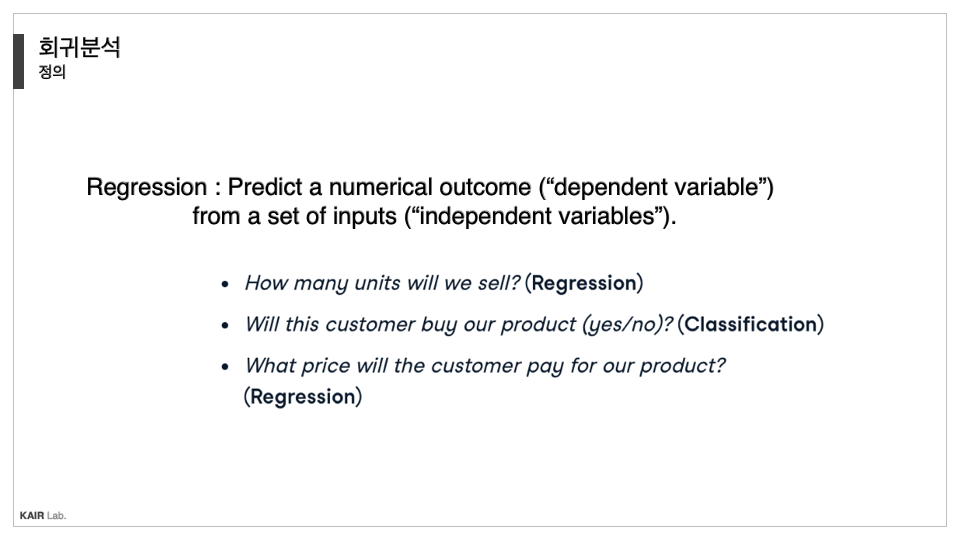

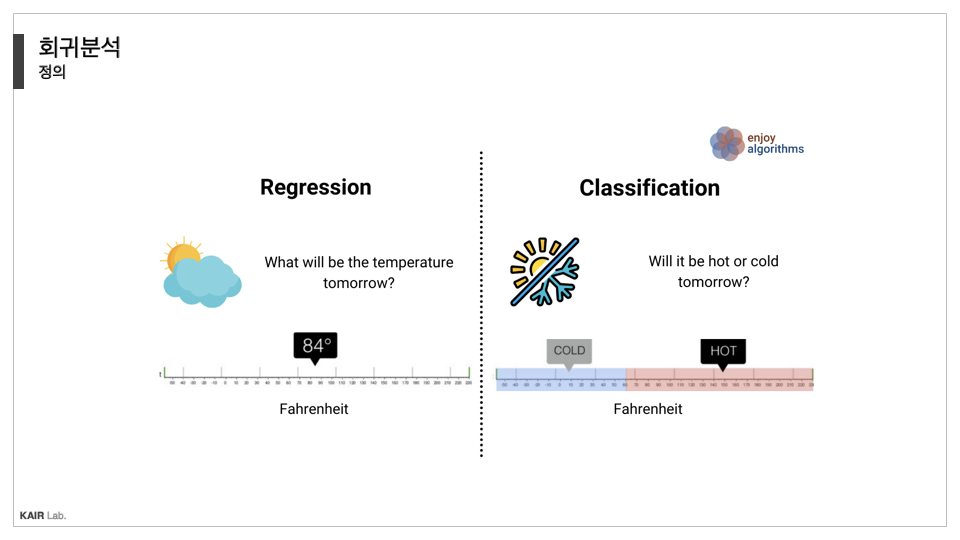

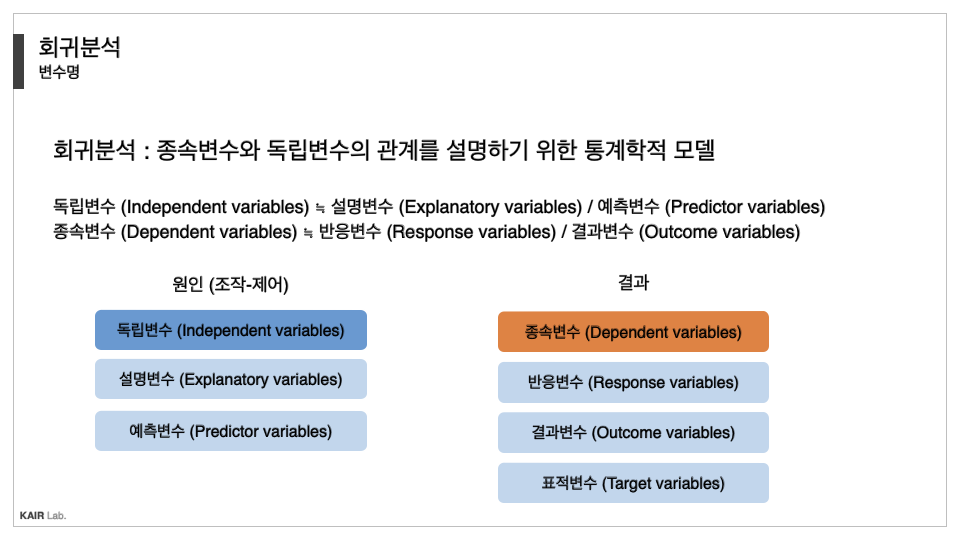

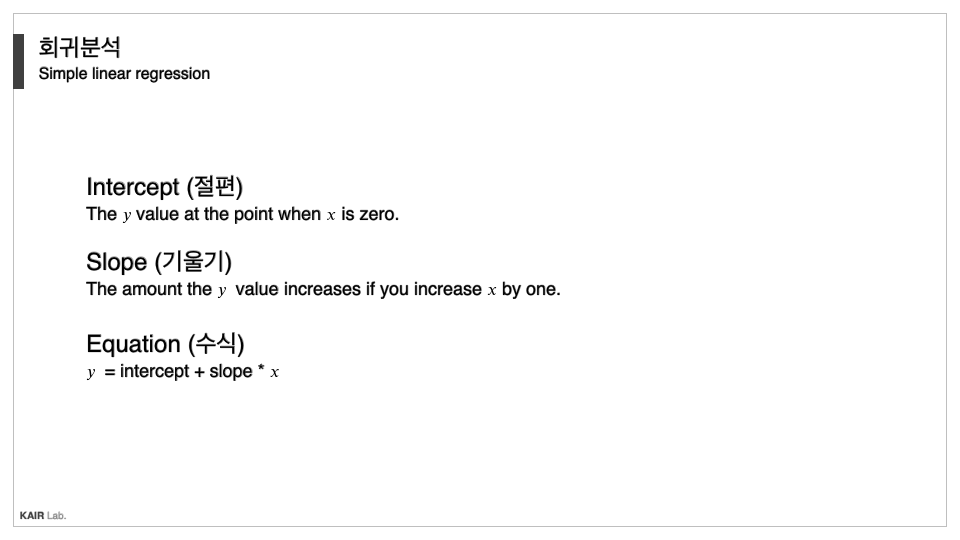

# 탐색적 데이터 분석 (EDA)

In [1]:
library(dplyr)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.2     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
data(women)

### women dataset
This data set gives the average heights and weights for American women aged 30-39.

A data frame with 15 observations on 2 variables.

'height' numeric Height (inch)
'weight' numeirc Weight (lbs)

### 상위 6개 행 보기 : head() <-> 하위 6개 행 보기 : tail()

In [3]:
head(women)

,height,weight
,<dbl>,<dbl>
1,58,115
2,59,117
3,60,120
4,61,123
5,62,126
6,63,129


### inch -> m / lbs -> kg 변환

In [4]:
women2<- women %>% mutate(height = round(height * 0.0254, 2),
weight = round(weight / 2.2,2))
head(women2)

,height,weight
,<dbl>,<dbl>
1,1.47,52.27
2,1.50,53.18
3,1.52,54.55
4,1.55,55.91
5,1.57,57.27
6,1.60,58.64


### 그래프

`geom_smooth()` using formula = 'y ~ x'


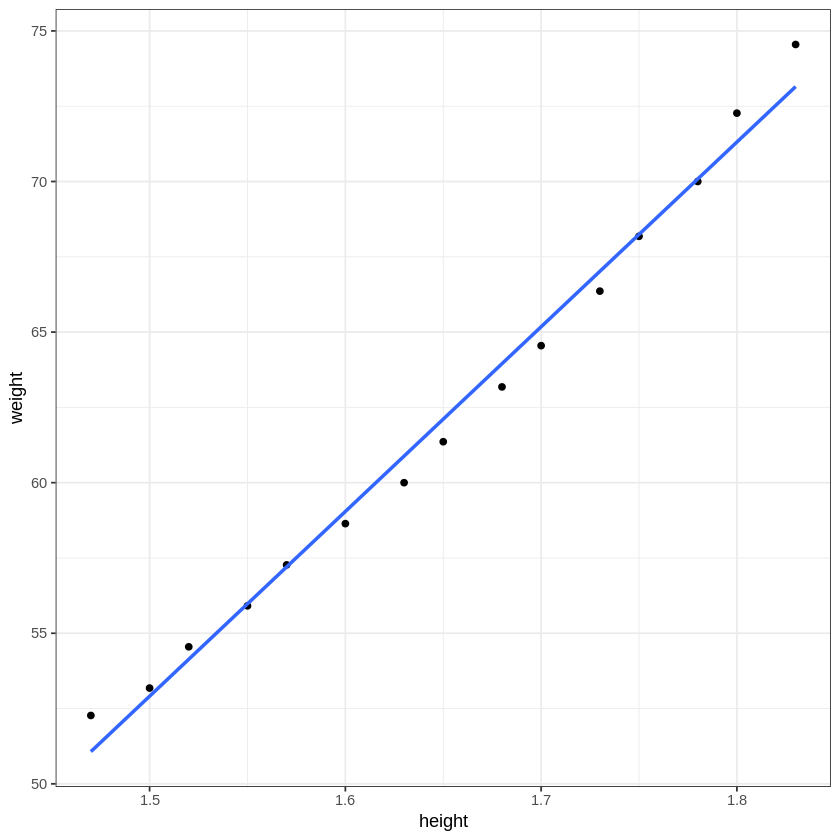

In [5]:
ggplot(aes(x = height, y = weight), data = women2) + geom_point() + geom_smooth(se = FALSE, method = "lm") + theme_bw()

# 선형 회귀 : lm()

lm(formula, data)

 \* formula = response variable ~ explanatory variable


In [6]:
lm(weight ~ height, data = women2)


Call:
lm(formula = weight ~ height, data = women2)

Coefficients:
(Intercept)       height  
     -39.10        61.34  


In [7]:
lm_model <- lm(weight ~ height, data = women2)

## summary()

In [8]:
summary(lm_model)


Call:
lm(formula = weight ~ height, data = women2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88369 -0.64239 -0.06667  0.34183  1.39877 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -39.097      2.941  -13.29 6.07e-09 ***
height        61.338      1.778   34.50 3.61e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7599 on 13 degrees of freedom
Multiple R-squared:  0.9892,	Adjusted R-squared:  0.9884 
F-statistic:  1190 on 1 and 13 DF,  p-value: 3.606e-14


### p-value < 0.05 이므로, height는 유의한 변수이고 모델의 p값도 < 0.05 이므로, 통계적으로 유의한 모델임

### R-squared 값이 0.9892 이므로 체중은 키로 98.9% 정도 설명이 가능
### weight = 61.3 * height - 39.1
### RSE(Residual standard error : 0.7599)

## Residual(잔차) = 실제 y값 - 예측한 y값

## 예측 : predict()

predict(model, data)

In [11]:
# 예측값
women_predict <- predict(lm_model, women2)

#column 추가 : cbind()
women_new <- cbind(women2, women_predict)
print(women_new)

   height weight women_predict
1    1.47  52.27      51.06966
2    1.50  53.18      52.90979
3    1.52  54.55      54.13654
4    1.55  55.91      55.97667
5    1.57  57.27      57.20343
6    1.60  58.64      59.04356
7    1.63  60.00      60.88369
8    1.65  61.36      62.11044
9    1.68  63.18      63.95057
10   1.70  64.55      65.17733
11   1.73  66.36      67.01746
12   1.75  68.18      68.24421
13   1.78  70.00      70.08434
14   1.80  72.27      71.31109
15   1.83  74.55      73.15123


In [12]:
# 잔차 계산
## mutate : 새로운 column 추가
women_new <- women_new %>% mutate(residual = weight - women_predict)
print(women_new)

   height weight women_predict    residual
1    1.47  52.27      51.06966  1.20034229
2    1.50  53.18      52.90979  0.27021165
3    1.52  54.55      54.13654  0.41345789
4    1.55  55.91      55.97667 -0.06667275
5    1.57  57.27      57.20343  0.06657349
6    1.60  58.64      59.04356 -0.40355714
7    1.63  60.00      60.88369 -0.88368778
8    1.65  61.36      62.11044 -0.75044154
9    1.68  63.18      63.95057 -0.77057218
10   1.70  64.55      65.17733 -0.62732594
11   1.73  66.36      67.01746 -0.65745658
12   1.75  68.18      68.24421 -0.06421033
13   1.78  70.00      70.08434 -0.08434097
14   1.80  72.27      71.31109  0.95890527
15   1.83  74.55      73.15123  1.39877463


## %>% (pipe operator)

<pre>
1)
women_new %>% mutate(residual = weight - women_predict)
2)
mutate(women_new, residual = weight - women_predict)

1)
women_predict <- predict(lm_model, women2)
women_new <- cbind(women2, women_predict)
2)
women_new <- women2 %>% mutate(women_predict = predict(lm_model, women2)



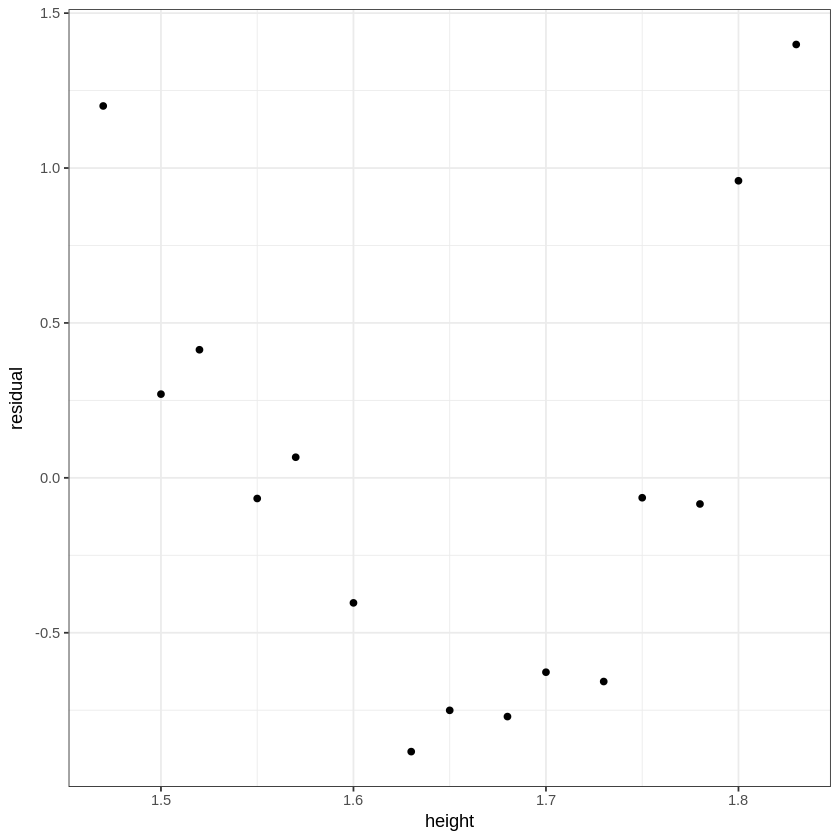

In [13]:
# 그래프
ggplot(aes(height, residual), data = women_new) + geom_point() + theme_bw()

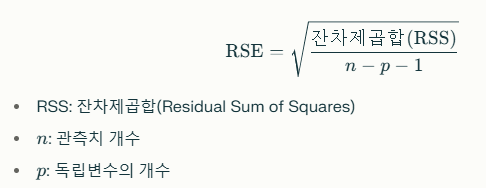

In [14]:
sqrt(sum((women_new$residual)^2) /  (15 - 1- 1))

[1] 0.7599322

The difference between predicted weight and observed weight is typically about 0.76kg

`geom_smooth()` using formula = 'y ~ x'


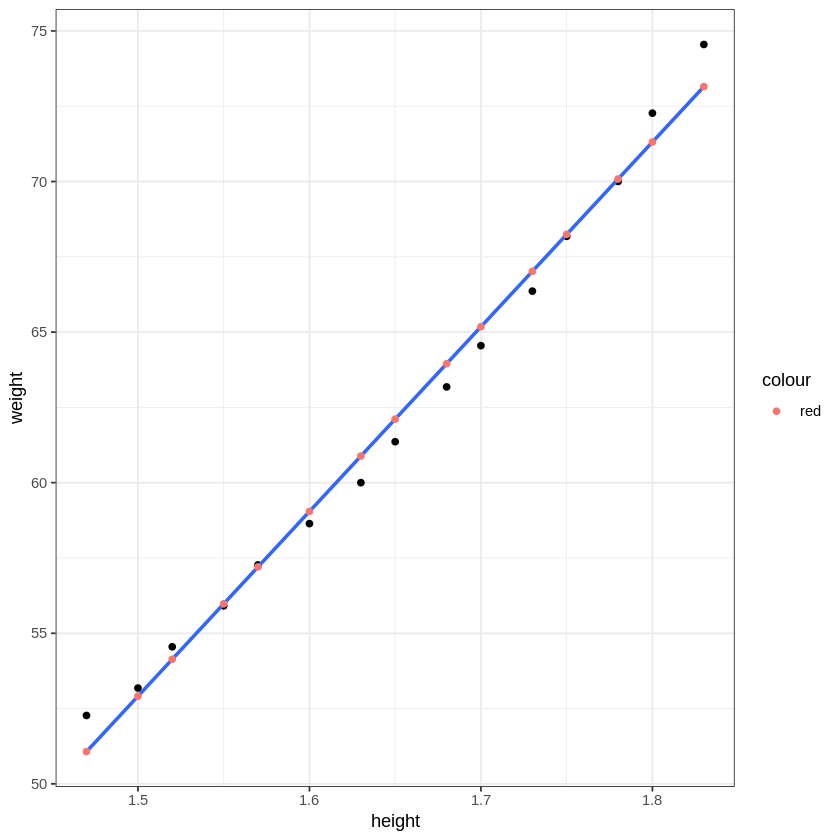

In [17]:
ggplot(aes(x = height, y = weight), data = women2) + geom_point() + geom_smooth(se = FALSE, method = "lm") + theme_bw() +
  geom_point(aes(x = height, y = women_predict, color = "red"), data = women_new)

## 절편이 없는 모델

In [18]:
lm_model2 <- lm(weight ~ height+0, data = women2)
summary(lm_model2)


Call:
lm(formula = weight ~ height + 0, data = women2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4565 -2.3120 -0.9401  1.5717  5.4535 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
height  37.7577     0.4366   86.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.797 on 14 degrees of freedom
Multiple R-squared:  0.9981,	Adjusted R-squared:  0.998 
F-statistic:  7480 on 1 and 14 DF,  p-value: < 2.2e-16


weight = 37.76 * height

## 회귀계수만 보고 싶을 때 : coefficients()
It returns a named numeric vector of coefficients. The names are the names of the coefficients.

In [23]:
coefficients(lm_model)

(Intercept)      height 
  -39.09674    61.33769

## 예측값만 보고 싶을 때 : fitted()

predictions on original dataset

In [24]:
fitted(lm_model)

1        2        3        4        5        6        7        8 
51.06966 52.90979 54.13654 55.97667 57.20343 59.04356 60.88369 62.11044 
       9       10       11       12       13       14       15 
63.95057 65.17733 67.01746 68.24421 70.08434 71.31109 73.15123

In [ ]:
#fitted와 동일
predict(lm_model, women2)

1        2        3        4        5        6        7        8 
51.06966 52.90979 54.13654 55.97667 57.20343 59.04356 60.88369 62.11044 
       9       10       11       12       13       14       15 
63.95057 65.17733 67.01746 68.24421 70.08434 71.31109 73.15123

## 잔차만 보고 싶을 때 : residuals ()
actual response values minus predicted response values

In [ ]:
residuals(lm_model)

1           2           3           4           5           6 
 1.20034229  0.27021165  0.41345789 -0.06667275  0.06657349 -0.40355714 
          7           8           9          10          11          12 
-0.88368778 -0.75044154 -0.77057218 -0.62732594 -0.65745658 -0.06421033 
         13          14          15 
-0.08434097  0.95890527  1.39877463

In [27]:
library(broom)

## tidy()

the coefficients level

In [28]:
tidy(lm_model)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-39.09674,2.941314,-13.29227,6.072369e-09
height,61.33769,1.777925,34.49959,3.606229e-14


## glance()
the model level

In [29]:
glance(lm_model)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9891957,0.9883646,0.7599322,1190.222,3.606229e-14,1,-16.09293,38.18586,40.31001,7.50746,13,15


## augment

the observation level

In [40]:
augment(lm_model)

weight,height,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52.27,1.47,51.06966,1.20034229,0.24532915,0.6830236,0.5373590014,1.81824111
53.18,1.50,52.90979,0.27021165,0.19092103,0.7861942,0.0184374308,0.39530633
54.55,1.52,54.13654,0.41345789,0.16012261,0.7801667,0.0335972524,0.59367464
55.91,1.55,55.97667,-0.06667275,0.12213545,0.7906957,0.0006099634,-0.09363965
57.27,1.57,57.20343,0.06657349,0.10228434,0.7907024,0.0004870287,0.09246068
58.64,1.60,59.04356,-0.40355714,0.08071814,0.7815744,0.0134680334,-0.55386746
60.00,1.63,60.88369,-0.88368778,0.06900452,0.7454683,0.0538270337,-1.20517530
61.36,1.65,62.11044,-0.75044154,0.06666910,0.7585112,0.0373170538,-1.02217252
63.18,1.68,63.95057,-0.77057218,0.07137644,0.7565293,0.0425522436,-1.05224927


# Quantifying model fit
## coefficient of determination

sometimes called "r-squared"

the proportion of the variance in the response variable that is predictable from the explanatory variable

**1** means a perfect fit
**0** means the worst possible fit

In [43]:
women2 %>% summarise(r2 = cor(weight, height)^2)

r2
<dbl>
0.9891957


It's just correlation squared

# Multiple linear regression

In [30]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




  Boston data
  
  ‘crim’ per capita crime rate by town.
  ‘zn’ proportion of residential land zoned for lots over 25,000 sq.ft.

 ‘indus’ proportion of non-retail business acres per town.

  ‘chas’ Charles River dummy variable (= 1 if tract bounds river; 0
          otherwise).

  ‘nox’ nitrogen oxides concentration (parts per 10 million).

 ‘rm’ average number of rooms per dwelling.

 ‘age’ proportion of owner-occupied units built prior to 1940.

 ‘dis’ weighted mean of distances to five Boston employment
          centres.

  ‘rad’ index of accessibility to radial highways.

 ‘tax’ full-value property-tax rate per $10,000.

 ‘ptratio’ pupil-teacher ratio by town.

 ‘black’ 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by
          town.

 ‘lstat’ lower status of the population (percent).

 ‘medv’ median value of owner-occupied homes in $1000s.

In [31]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [32]:
cor(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.00000000,-0.20046922,0.40658341,-0.055891582,0.42097171,-0.21924670,0.35273425,-0.37967009,0.625505145,0.58276431,0.2899456,-0.38506394,0.4556215,-0.3883046
zn,-0.20046922,1.00000000,-0.53382819,-0.042696719,-0.51660371,0.31199059,-0.56953734,0.66440822,-0.311947826,-0.31456332,-0.3916785,0.17552032,-0.4129946,0.3604453
indus,0.40658341,-0.53382819,1.00000000,0.062938027,0.76365145,-0.39167585,0.64477851,-0.70802699,0.595129275,0.72076018,0.3832476,-0.35697654,0.6037997,-0.4837252
chas,-0.05589158,-0.04269672,0.06293803,1.000000000,0.09120281,0.09125123,0.08651777,-0.09917578,-0.007368241,-0.03558652,-0.1215152,0.04878848,-0.0539293,0.1752602
nox,0.42097171,-0.51660371,0.76365145,0.091202807,1.00000000,-0.30218819,0.73147010,-0.76923011,0.611440563,0.66802320,0.1889327,-0.38005064,0.5908789,-0.4273208
rm,-0.21924670,0.31199059,-0.39167585,0.091251225,-0.30218819,1.00000000,-0.24026493,0.20524621,-0.209846668,-0.29204783,-0.3555015,0.12806864,-0.6138083,0.6953599
age,0.35273425,-0.56953734,0.64477851,0.086517774,0.73147010,-0.24026493,1.00000000,-0.74788054,0.456022452,0.50645559,0.2615150,-0.27353398,0.6023385,-0.3769546
dis,-0.37967009,0.66440822,-0.70802699,-0.099175780,-0.76923011,0.20524621,-0.74788054,1.00000000,-0.494587930,-0.53443158,-0.2324705,0.29151167,-0.4969958,0.2499287
rad,0.62550515,-0.31194783,0.59512927,-0.007368241,0.61144056,-0.20984667,0.45602245,-0.49458793,1.000000000,0.91022819,0.4647412,-0.44441282,0.4886763,-0.3816262
tax,0.58276431,-0.31456332,0.72076018,-0.035586518,0.66802320,-0.29204783,0.50645559,-0.53443158,0.910228189,1.00000000,0.4608530,-0.44180801,0.5439934,-0.4685359


In [33]:
library(corrplot)

ERROR: Error in library(corrplot): there is no package called ‘corrplot’


In [34]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [35]:
library(corrplot)

corrplot 0.95 loaded



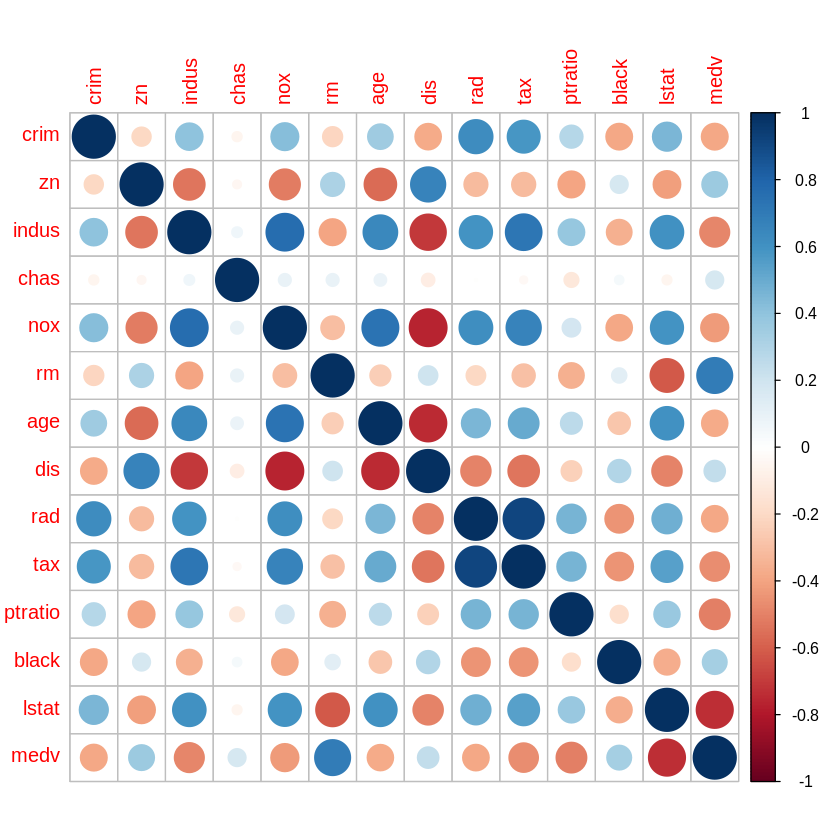

In [36]:
corrplot(cor(Boston))

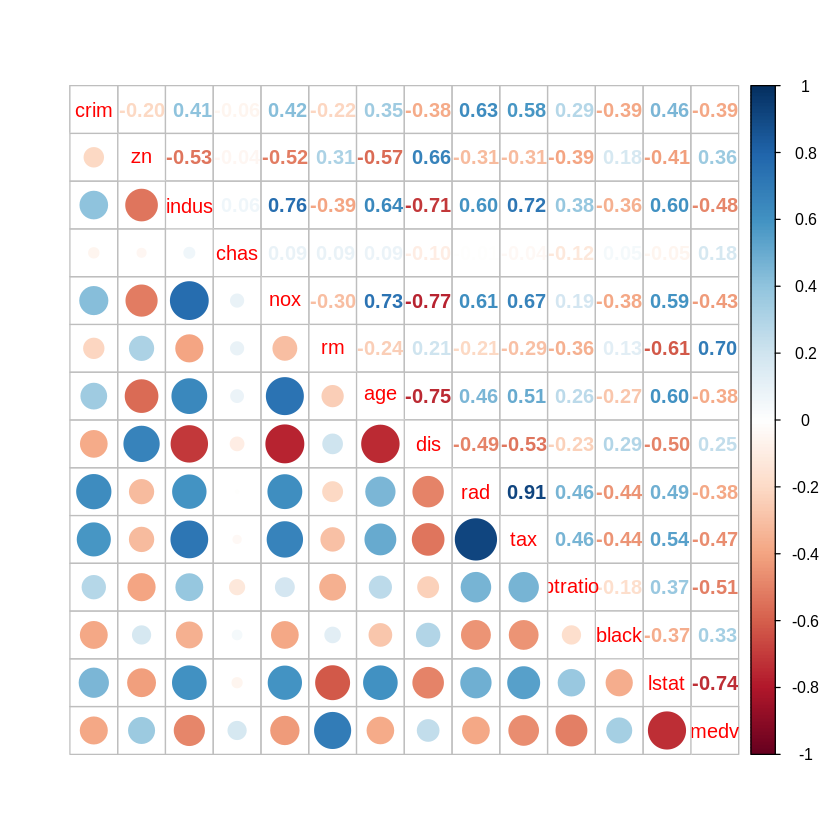

In [37]:
corrplot.mixed(cor(Boston), upper = "number", lower = "circle")

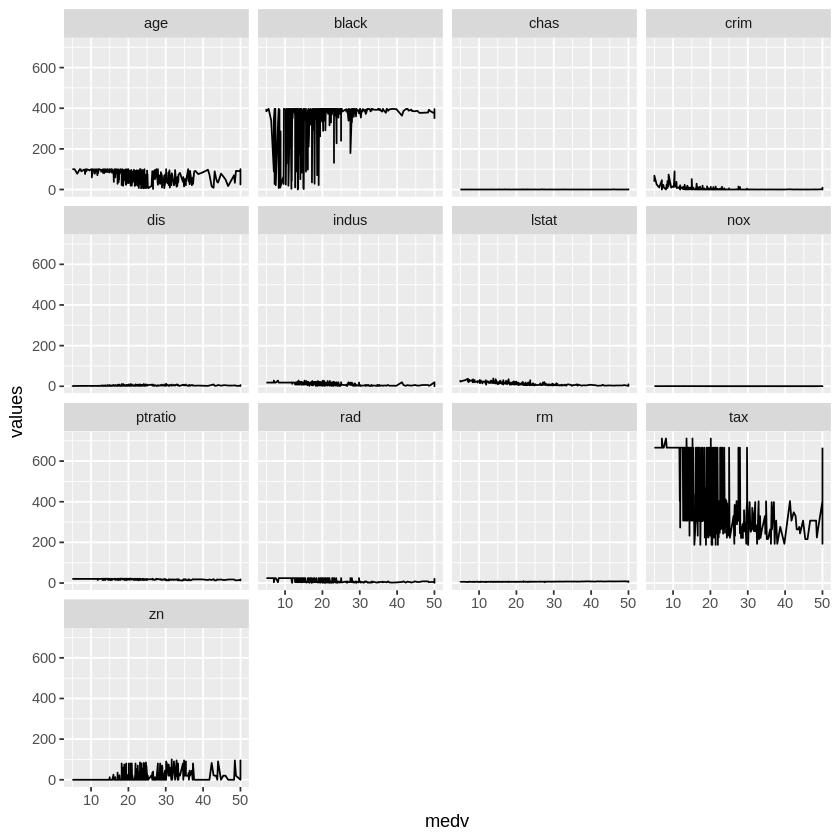

In [38]:
Boston %>% pivot_longer(-medv, names_to = "metric", values_to = "values") %>%
  ggplot(aes(medv, values)) + geom_line() + facet_wrap(~metric)